In [1]:
using ModelingToolkit, DifferentialEquations

@parameters r1 r_GP1 r_ALD L_PFK L_PFK2 Vf_PFK Vr_PFK Vf_PFK2 Vr_PFK2 K_f6p K_ATP K_f16bp K_ADP K_cit K_AMP K_f26bp K_PFK2 K2_f6p K2_ATP K2_f26bp K2_ADP
@parameters C_ATP C_ADP C_cit C_AMP
@parameters psi
@variables t f6p(t) f16bp(t) f26bp(t)
D = Differential(t)

N_PFK = 1 + L_PFK*(1+C_ATP/K_ATP)^4*(1+C_cit/K_cit)/((1+f6p/K_f6p+f16bp/K_f16bp)^4+(1+C_AMP/K_AMP)^4*(1+f26bp/K_f26bp)^4)
r_PFK = (Vf_PFK*C_ATP*f6p/(K_f6p*K_ATP) - Vr_PFK*C_ADP*f16bp/(K_f16bp*K_ADP))/((1+f6p/K_f6p)*(1+C_ATP/K_ATP)+(1+f16bp/K_f16bp)*(1+C_ADP/K_ADP)-1)*(1/N_PFK)

N_PFK2 = 1 + L_PFK2*(psi/(1-psi))^2
#r_PFK2 = Vf_PFK2*(C_ATP*f6p-(C_ADP*f26bp)/K_PFK2) * (1/N_PFK2)

r_PFK2 = ((Vf_PFK2*C_ATP*f6p)/(K2_ATP*K2_f6p)-(Vr_PFK2*C_ADP*f26bp)/(K2_f26bp*K2_ADP))/((1+f6p/K2_f6p)*(1+C_ATP/K2_ATP)+(1+f26bp/K2_f26bp)*(1+C_ADP/K2_ADP)-1)*(1-(1/N_PFK2))
r_F26Pase = r1*(1/N_PFK2)

eqs = [D(f6p) ~ r_GP1 - r_PFK,
    D(f16bp) ~ r_PFK - r_ALD,
    D(f26bp) ~ r_PFK2 - r_F26Pase]

@named sys = ODESystem(eqs, t)



Model sys with 3 equations
Unknowns (3):
  f6p(t)
  f16bp(t)
  f26bp(t)
Parameters (25):
  K_f16bp
  K_AMP
  K_ATP
  K_ADP
⋮

In [2]:
sys=structural_simplify(sys)

u0 = [f6p => 100,
    f16bp => 0.1,
    f26bp => 0.1]

p1 = [r_GP1 => 0.9, 
    r_ALD => 0.9,
    L_PFK => 2*10^-3,
    L_PFK2 => 1*10^-3,
    Vf_PFK => 15.5*10^2,
    Vr_PFK => 6.78*10^1,
    Vf_PFK2 => 41.6, 
    Vr_PFK2 => 30,
    K_f6p => 6*10^-2,
    K_ATP => 0.1,
    K_f16bp => 0.65,
    K_ADP => 0.01,
    K_cit => 0.1,
    K_AMP => 0.3,
    K_f26bp => 5.5*10^-3,
    K_PFK2 => 16,
    K2_f6p => 5*10^-2,
    K2_ATP => 0.1,
    K2_f26bp => 5.5*10^-3,
    K2_ADP => 0.1,
    psi => 0.8,
    r1 => 0.2]

p2 = [C_ATP => 0.1, 
    C_ADP => 0.9,
    C_cit => 0.1,
    C_AMP => 0.1]    

p= [p1  
    p2]

    

26-element Vector{Pair{Num, Float64}}:
    r_GP1 => 0.9
    r_ALD => 0.9
    L_PFK => 0.002
   L_PFK2 => 0.001
   Vf_PFK => 1550.0
   Vr_PFK => 67.8
  Vf_PFK2 => 41.6
  Vr_PFK2 => 30.0
    K_f6p => 0.06000000000000001
    K_ATP => 0.1
          ⋮
   K2_ATP => 0.1
 K2_f26bp => 0.0055
   K2_ADP => 0.1
      psi => 0.8
       r1 => 0.2
    C_ATP => 0.1
    C_ADP => 0.9
    C_cit => 0.1
    C_AMP => 0.1

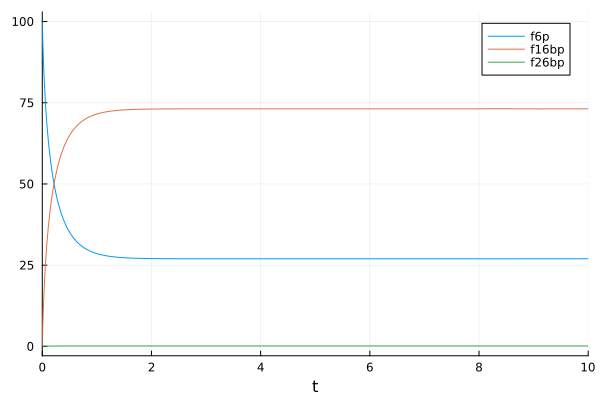

In [3]:
tspan = (0.0, 10)
prob = ODEProblem(sys, u0, tspan, p, jac = true)
sol = solve(prob)

using Plots
plot(sol)

In [8]:
sol[end]

3-element Vector{Float64}:
  3.564317643489552
 96.53568235651043
  0.05507377868444471